<a href="https://colab.research.google.com/github/sinjy1203/gender_classifier/blob/master/gender_classifier_1(training).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros((sample_count, 4,4,512))
    labels = np.zeros((sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150,150), batch_size=batch_size, class_mode='binary')
    i = 0
    for x, y in generator:
        if (i + 1) * batch_size > sample_count:
            break
        features[batch_size*i : batch_size*(i+1)] = conv_base.predict(x)
        labels[batch_size*i : batch_size*(i+1)] = y
        print(batch_size * (i+1))
        i += 1
    return features, labels

In [64]:
train_features, train_labels = extract_features(train_dir, 1600)
val_features, val_labels = extract_features(val_dir, 340)
test_features, test_labels = extract_features(test_dir, 340)

Found 1600 images belonging to 2 classes.
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540
1560
1580
1600
Found 340 images belonging to 2 classes.
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
Found 340 images belonging to 2 classes.
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340


In [0]:
train_features = np.reshape(train_features, (-1, 4*4*512))
val_features = np.reshape(val_features, (-1, 4*4*512))
test_features = np.reshape(test_features, (-1, 4*4*512))

In [66]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input

input = Input(shape=(4*4*512))
x = layers.Dense(256, activation='relu')(input)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid')(x)
model = Model(inputs=input, outputs=output)
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(val_features, val_labels))

Epoch 1/30
80/80 [==============================] - 0s 4ms/step - loss: 0.4713 - acc: 0.8225 - val_loss: 0.2664 - val_acc: 0.9000
Epoch 2/30
80/80 [==============================] - 0s 5ms/step - loss: 0.1405 - acc: 0.9481 - val_loss: 0.2900 - val_acc: 0.8824
Epoch 3/30
80/80 [==============================] - 0s 3ms/step - loss: 0.0880 - acc: 0.9694 - val_loss: 0.2610 - val_acc: 0.9059
Epoch 4/30
80/80 [==============================] - 0s 3ms/step - loss: 0.0734 - acc: 0.9775 - val_loss: 0.2408 - val_acc: 0.8971
Epoch 5/30
80/80 [==============================] - 0s 3ms/step - loss: 0.0356 - acc: 0.9906 - val_loss: 0.3204 - val_acc: 0.9059
Epoch 6/30
80/80 [==============================] - 0s 3ms/step - loss: 0.0446 - acc: 0.9881 - val_loss: 0.3381 - val_acc: 0.8882
Epoch 7/30
80/80 [==============================] - 0s 3ms/step - loss: 0.0266 - acc: 0.9944 - val_loss: 0.2736 - val_acc: 0.8853
Epoch 8/30
80/80 [==============================] - 0s 3ms/step - loss: 0.0284 - acc: 0.99

In [67]:
model.evaluate(test_features, test_labels)

11/11 [==============================] - 0s 2ms/step - loss: 0.5027 - acc: 0.8941


[0.5027468204498291, 0.8941176533699036]

In [0]:
model.save("./gender.h5")

[[1.]]


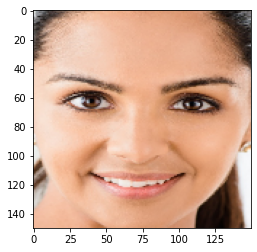

In [69]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

dir = "/content/drive/My Drive/image_data/dataset1/test/woman/face_10.jpg"
# img = plt.imread(dir)
img = cv.imread(dir)
img_ = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img__ = cv.resize(img_, (150,150))
# img_ = np.resize(img, (150, 150, 3))
plt.imshow(img__)
img___ = np.reshape(img__, (1, 150, 150, 3))
pred = conv_base.predict(img___)
pred_ = np.reshape(pred, (1, 4*4*512))
pred__ = model.predict(pred_)
print(pred__)  ###1은 여자 , 0은 남자